In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from pandas import read_csv

f = 'online_news_popularity.csv'
df = read_csv(f)
df= df.drop(columns=['url'])
labels = [' n_tokens_title',' n_tokens_content',' n_unique_tokens',' n_non_stop_words',' n_non_stop_unique_tokens',' num_hrefs',
' num_self_hrefs',' num_imgs',' num_videos',' average_token_length',' num_keywords',' data_channel_is_lifestyle',
' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',
' data_channel_is_world',' kw_min_min',' kw_max_min',' kw_avg_min',' kw_min_max',' kw_max_max',' kw_avg_max',
' kw_min_avg',' kw_max_avg',' kw_avg_avg',' self_reference_min_shares',' self_reference_max_shares',
' self_reference_avg_sharess',' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',
' weekday_is_friday',' weekday_is_saturday',' weekday_is_sunday',' is_weekend',' LDA_00',' LDA_01',' LDA_02',' LDA_03',
' LDA_04',' global_subjectivity',' global_sentiment_polarity',' global_rate_positive_words',' global_rate_negative_words',
' rate_positive_words',' rate_negative_words',' avg_positive_polarity',' min_positive_polarity',' max_positive_polarity',
' avg_negative_polarity',' min_negative_polarity',' max_negative_polarity',' title_subjectivity',' title_sentiment_polarity',
' abs_title_subjectivity',' abs_title_sentiment_polarity',' shares']


In [2]:
def normalize(df): # function for min/max scaling. Please take note you can use functions from libraries instead.
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        mean_value = df[feature_name].mean()
        result[feature_name] = (df[feature_name] - mean_value) / (max_value - min_value)
        
    return result
df = normalize(df) # using the function


E:\Andaconda\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: MaxNLocator.set_params got an unexpected parameter: numticks
  import sys


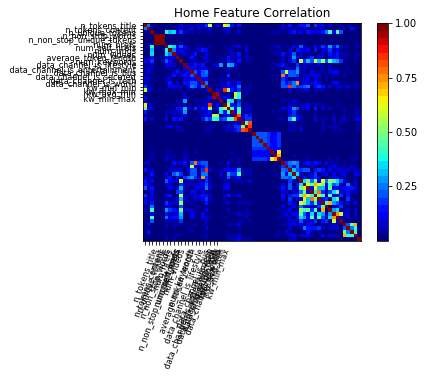

In [3]:
def correlation_matrix(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30) # color map for the heatmap. you can use other maps like: gnuplot, rainbow, brg
    cax = ax1.imshow(np.abs(df.corr()), interpolation="nearest", cmap=cmap)
    plt.title('Home Feature Correlation') # plot title
    plt.locator_params(numticks=21) # number of labels
    ax1.set_xticks(range(21)) # for x axis
    ax1.set_yticks(range(21)) # for y axis
    ax1.set_xticklabels(labels,fontsize=8, rotation=70) # rotating labels for better look
    ax1.set_yticklabels(labels,fontsize=8)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0,0.25,0.5,0.75,1.0]) # plot map indicators
    plt.show()
    
correlation_matrix(df)

In [4]:

cor = df.corr()
threshold = 0.05
cor_target = abs(cor[' shares'])
#Selecting highly correlated features
selected = cor_target[cor_target>threshold]

In [5]:
selected1 = selected.drop(' shares')
feature_names = selected1.index.values

In [6]:
import timeit

import pandas as pd
popular = pd.read_csv('online_news_popularity.csv')
popular.head()
#print(popular)

from pandas.plotting  import scatter_matrix
from matplotlib import cm
x=popular[feature_names]
y=popular[' shares']


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 )
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train1= x_train
x_test1=x_test
y_train1=y_train
y_test1=y_test


27750
11894
39644


In [8]:
from sklearn.tree import DecisionTreeClassifier
start = timeit.default_timer()
clf = DecisionTreeClassifier().fit(x_train,y_train)
stop = timeit.default_timer()
print ('Runtime in seconds: ', stop-start)
print ('Accuracy of Decision Tree Classifier on Training Set: {:.2f}'.format(clf.score(x_train,y_train)))
print ('Accuracy of Decision Tree Classifier on test Set: {:.2f}'.format(clf.score(x_test,y_test)))
print("")


Runtime in seconds:  4.6119664
Accuracy of Decision Tree Classifier on Training Set: 1.00
Accuracy of Decision Tree Classifier on test Set: 0.02



In [9]:
from sklearn.neighbors import KNeighborsClassifier
start = timeit.default_timer()
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
stop = timeit.default_timer()
print ('Runtime in seconds: ', stop-start)
print ('Accuracy of K-NN Classifier on training set : {:.2f}'.format(knn.score(x_train,y_train1)))
print ('Accuracy of K-NN Classifier on test Set: {:.2f}'.format(knn.score(x_test,y_test1)))
print("")

Runtime in seconds:  0.0485199999999999
Accuracy of K-NN Classifier on training set : 0.23
Accuracy of K-NN Classifier on test Set: 0.01



In [10]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
start = timeit.default_timer()
svm=SVR()
svm.fit(x_train, y_train)
stop = timeit.default_timer()
print ('Runtime in seconds: ', stop-start)
print ('Mean Squared Error of SVM Regression on training set : {:.2f}'.format(mean_squared_error(svm.predict(x_train),y_train)))
print ('Mean Squared Error of SVM Regression on test Set: {:.2f}'.format(mean_squared_error(svm.predict(x_test),y_test)))
print("")

Runtime in seconds:  22.562988700000002
Mean Squared Error of SVM Regression on training set : 120144525.53
Mean Squared Error of SVM Regression on test Set: 181990641.37

